# Chapter07 확률분포(Probability Distribution) 

- <a href="#7.0사전학습">7.0 사전학습</a>
- <a href="#7.1이산확률분포">7.1 이산확률분포</a>
- <a href="#7.2연속확률분포">7.2 연속확률분포</a>

In [182]:
# 워닝 메시지 안나오게 하는 방법
import warnings
warnings.filterwarnings('ignore')

# 공통으로 사용하는 라이브러리 가져오기
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

-----------------

## <a name="7.0사전학습">7.0 사전학습</a>

### [복습] 6장 이산확률변수에서 다룬 내용
- 예제 6-3:주사위를 두 번 반복 시행해서 두 눈의 차의 절대값: 확률변수 X

- **확률변수 X의 상태공간**

In [183]:
'''
주사위 2번 던져 두 눈의 차의 절대값을 확률변수 X라할 때
'''
import itertools

D = list(range(1,7))
outcomes = list( itertools.product(D, repeat=2) ) # 주사위를 두번 던지는 시행

x_set = { abs(x1-x2) for x1, x2 in outcomes } # 두 눈의 차의 절대값을 나타내는 확률변수의 상태공간
print(f'#확률변수 X 상태공간: {x_set}')  

# 그래프 그리기를 위해 리스트로 변환한후 numpy 데이터로 변환한다.
x_set = np.array(list(x_set))
x_set

#확률변수 X 상태공간: {0, 1, 2, 3, 4, 5}


array([0, 1, 2, 3, 4, 5])

- **확률변수 X의 확률질량함수 f(x)**

In [184]:
# 확률변수 X의 확률질량함수
def f(x) :
    freq = np.array([(x1, x2) for x1, x2 in outcomes if abs(x1-x2)== x ] ) 
    return  round(len(freq) / len(outcomes), 3)

- **확률변수 X**

In [185]:
X = [x_set, f]

-  **확률**

In [186]:
prob = [ f(x) for x in x_set]
prob

[0.167, 0.278, 0.222, 0.167, 0.111, 0.056]

---------------------------------------------------------------------

- **확률변수의 평균=기대값: E(X)** <br>
$\mu = E(X) = \sum_{모든x} xf(x)$

In [187]:
sum([x*p for x, p in zip(x_set, prob)])    

1.947

In [188]:
def E(X):
    x_set, f = X
    return np.sum([x * f(x) for x in x_set])

In [189]:
# y=g(x) 함수식 사용
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x) * f(x) for x in x_set])

In [190]:
E(X)

1.947

- **확률변수의 분산: V(X)** <br>
Var(X) = $E[(X-\mu)^2] = \sum_{i=1}^n (x_i - \mu)^2 p_i$ = $E(X^2) -\mu^2$  <br>
$E(X^2) =\sum_{i=1}^n x^2 p_i$ <br>
$\mu = \sum_{i=1}^n x_i p_i$ <br> 
$\sum_{i=1}^n p_i=1$

In [191]:
def Var(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x - mean)**2 * f(x) for x in x_set])

In [192]:
# y=g(x) 함수식 사용
def Var(X, g=lambda x:x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x) - mean)**2 * f(x) for x in x_set])

In [193]:
Var(X)

2.058

- **확률을 이용한 기대값과 분산 출**

In [194]:
def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x) for x in x_set])  
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')

In [195]:
check_prob(X)

기대값 E(X): 1.947
분산   V(X): 2.058


- **확률분포 그래프**

In [196]:
def plot_prob(X):
    x_set, f = X
    
    prob = np.array([ f(x) for x in x_set])
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    print(x_set)
    print(prob)
    print(E(X))
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red')  #기대값:평균
    ax.set_xticks(np.append(x_set, E(X)))   #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)          #y축의 한계 지정
    ax.legend()
    for x, y in zip(x_set, prob):
        ax.text(x, y, round(y,4))
    
    plt.show()    

[0 1 2 3 4 5]
[0.167 0.278 0.222 0.167 0.111 0.056]
1.9469999999999998


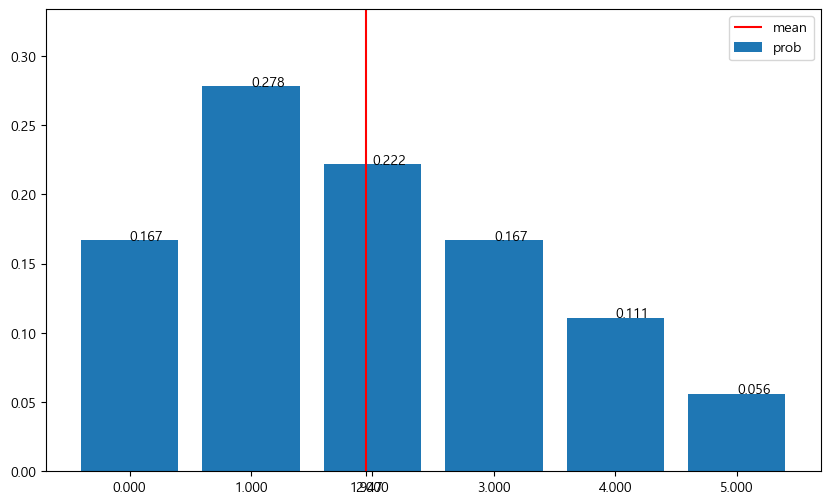

In [197]:
plot_prob(X)

### [사전필수] 확률분포 관련 파이썬 라이브러리 : Scipy
https://scipy.org/ 

In [198]:
# scipy 라이브러리 설치
!pip install scipy

In [199]:
# scipy 수치해석기능을 제공하는 파이썬 패키지
# scipy의 서브패키지등 중 stats는 확률분포 분석 기능을 제공한다.
import scipy as sp
import scipy.stats

#### scipy 확률분포 클래스
- 이산 : bernoulli (베르누이분포)- 이진분류
- 이산 : **binom (이항분포) - 이진분류**
- 이산 : **multinomial (다항분포) - 다중분류**
- 이산 : geometric(기하분포)
- 이산 : poisson (포아송분포)

- 연속 : uniform (균일분포)
- 연속 : **norm (정규분포)**
- 연속 : beta (베타분포)
- 연속 : gamma (감마분포)
- 연속 : t (스튜던트 t분포)
- 연속 : f (F분포)
- 연속 : chi2 (카이제곱분포)
- 연속 : dirichlet (디리클리분포)    
- 연속 : **multivariate_normal (다변수 정규분포)**

#### 확률분포 클래스 사용방법

In [200]:
# 정규분포 클래스 사용 방법
rv = sp.stats.norm()

# 모수지정하여 클래스 사용 방법
# loc: 분포의 기대값
# scale : 분포의 표준편차
rv = sp.stats.norm(loc=1, scale=2) # 기대값1 표준편차2인 정규분포 객체

#### Scipy 확률분포 메서드
- pmf : 확률질량함수(probability mass function) 
- pdf : 확률밀도함수(probability density function)
- cdf : 누적분포함수(cumulative distibution function)
- ppf : 누적분포함수의 역함수(inverse cumulative distibution function)
- sf  : 생존함수(survival function) = 1 - 누적분포함수
- isf : 생존함수의 역함수(inverse survival function)
- rvs : 랜덤 표본 생성(random variable sampling)
- **생존함수**: 생존분석은 통계학의 한 분야로, 어떠한 현상이 발생하기까지에 걸리는 시간에 대해 분석하는 것이다. 예를 들면, 생명체의 관찰시작부터 사망에 이르는 시간을 분석하는 것이 있다

#### 확률분포 메서드 사용방법 
- 확률밀도함수(probability density function)

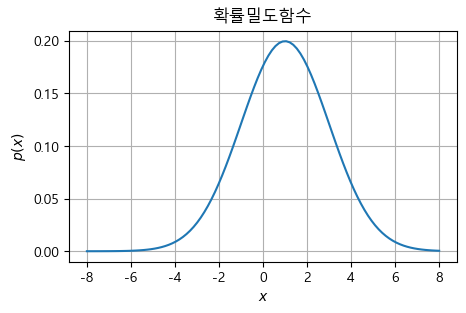

In [201]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title('확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid()
plt.show()

- 누적분포함수(cumulative distibution function)

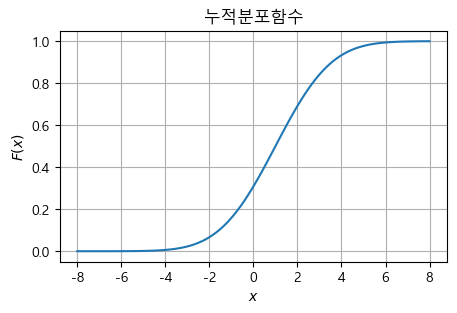

In [202]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title('누적분포함수')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.grid()
plt.show()

- 랜덤 표본 생성(random variable sampling)

In [203]:
# size = 표본 생성시 생성될 표본 크기
# random_state = 표본 생성시 사용되는 시드(seed)값
rv.rvs(size=(3,5), random_state=0)

array([[ 4.528,  1.8  ,  2.957,  5.482,  4.735],
       [-0.955,  2.9  ,  0.697,  0.794,  1.821],
       [ 1.288,  3.909,  2.522,  1.243,  1.888]])

In [204]:
#!pip install seaborn

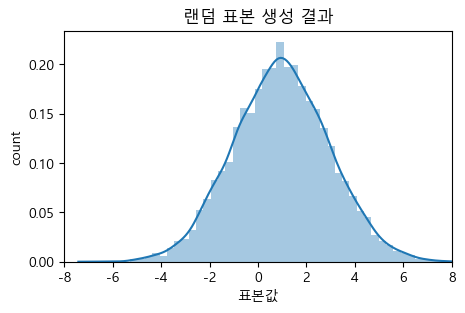

In [205]:
import seaborn as sns
sns.distplot( rv.rvs(size=10000, random_state=0) )
plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('count')
plt.xlim(-8, 8)
plt.show()

--------

## <a name="7.1이산확률분포">7.1 이산확률분포</a>

### 1.베르누이 분포(Bernoulli distribution)
성공률이 $p$인 베르누이 실험에서 성공이면 $X=1$, 실패이면 $X=0$이라 할 때, 확률변수 X의 확률분포 

- $X \sim B(1, p) = X \sim B(x, \mu) = \mu^x(1 - \mu)^(1-x) $
- $E(X)=p$
- $V(X)=p(1-p)$

In [206]:
def Bern(p):
    x_set = np.array([0,1])
    
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0

    return x_set, f

In [207]:
p = 1/4  #성공확률 p
X = Bern(p)

- 평균(기대값)과 분산

In [208]:
check_prob(X)

기대값 E(X): 0.25
분산   V(X): 0.1875


- 확률변수 X 그래프

[0 1]
[0.75 0.25]
0.25


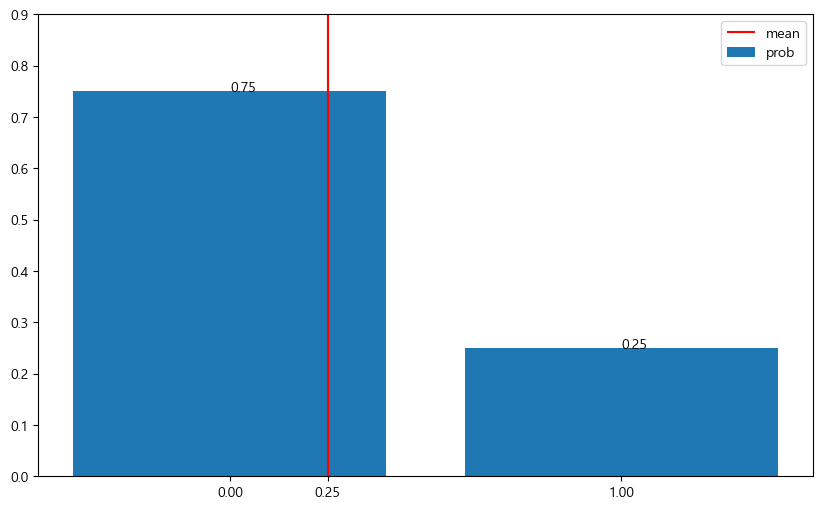

In [209]:
plot_prob(X)

#### * scipy bernoulli()

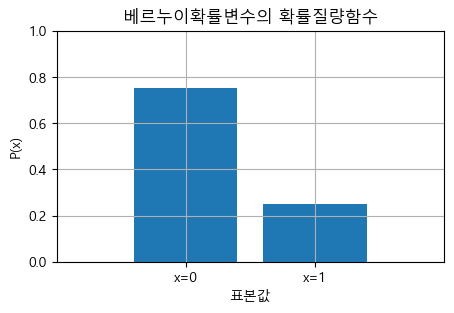

In [210]:
mu = 1/4
rv = sp.stats.bernoulli(mu)

# 확률질량함수 pmf() 메서드 사용해서 그래프 그리기
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)  # X축범위
plt.ylim(0, 1)   # Y축범위
plt.xticks([0,1], ['x=0','x=1']) # X축 눈금
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('베르누이확률변수의 확률질량함수')
plt.grid()
plt.show()

#### # 베르누이확률변수의 표본값을 무작위로 생성
https://seaborn.pydata.org/generated/seaborn.countplot.html

[0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]


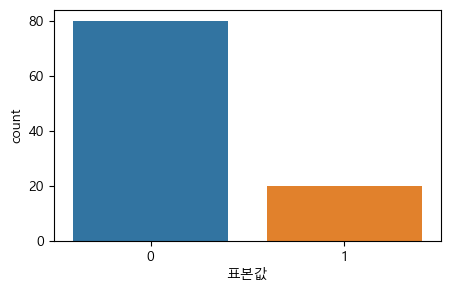

In [211]:
# 베르누이확률변수의 표본값을 무작위로 생성
mu = 1/4
rv = sp.stats.bernoulli(mu)
x = rv.rvs(100, random_state=0)
print(x)

sns.countplot(x=x)
plt.xlabel('표본값')
plt.show()

### [실습] 베르누이분포를 따르는 표본의 기대값과 분산을 구하고 그래프를 그리시오.
1. $mu = 0.5$, 표본이 10개인 경우, 
2. $mu = 0.5$,  표본이 100개인 경우

기대값: 0.5, 분산: 0.25
[1 1 1 1 0 1 0 1 1 0]


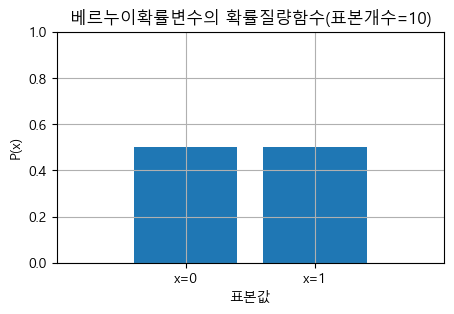

[1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0]


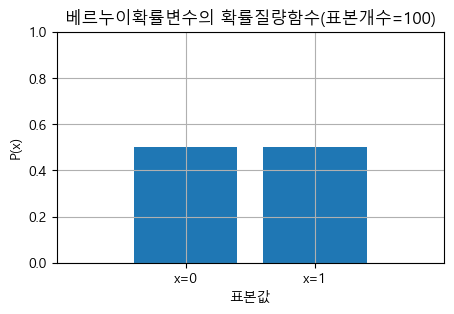

In [213]:
def plot_bernoulli(mu, M):    
    rv = sp.stats.bernoulli(mu)
    x = rv.rvs(size=M, random_state=0)
    print(x)
    
    # 확률질량함수 pmf() 메서드 사용해서 그래프 그리기
    plt.bar(x, rv.pmf(x))
    plt.xlim(-1, 2)
    plt.ylim(0, 1)
    plt.xticks([0,1], ['x=0','x=1'])
    plt.xlabel('표본값')
    plt.ylabel('P(x)')
    plt.title(f'베르누이확률변수의 확률질량함수(표본개수={M})')
    plt.grid()
    plt.show()

mu = 0.5    
print(f'기대값: {mu}, 분산: {mu*(1-mu)}')
plot_bernoulli(0.5, 10)
plot_bernoulli(0.5, 100)

### 2.이항분포(binomial distributuin)
매회 성공률이 $p$인 베르누이 실험을 독립적으로 $n$번 반복할 때, 성공한 횟수$(X)$의 확률분포를 모수 $n$과 $p$인 이항분포

- $X \sim B(n, p)$ :  $_{n}\mathrm{C}_{k}p^{x}q^{n-x}$
- $E(X)=np$
- $V(X)=np(1-p)$

#### * 이항분포의 확률질량함수 f(x)

In [216]:
#scipy패키지의 special모듈에 있는 comb함수 사용
import numpy as np
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
        
    return x_set, f

n, p = 6, 0.4
X = Bin(n, p)
X

(array([0, 1, 2, 3, 4, 5, 6]), <function __main__.Bin.<locals>.f(x)>)

기대값 E(X): 2.4
분산   V(X): 1.44
[0 1 2 3 4 5 6]
[0.047 0.187 0.311 0.276 0.138 0.037 0.004]
2.4000000000000004


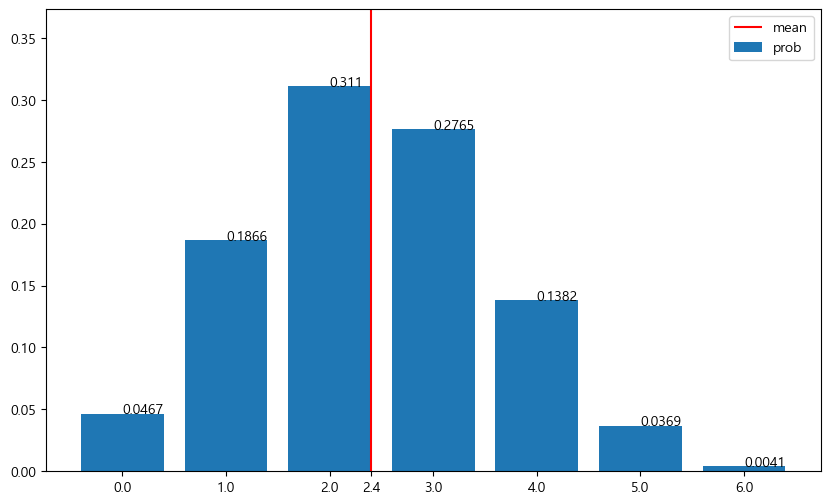

In [217]:
# 기대값과 분산
check_prob(X)

# 그래프
plot_prob(X)

#### * scipy.stats에 있는 이항분포의 확률질량함수 : scipy.stats.binom(n, mu)

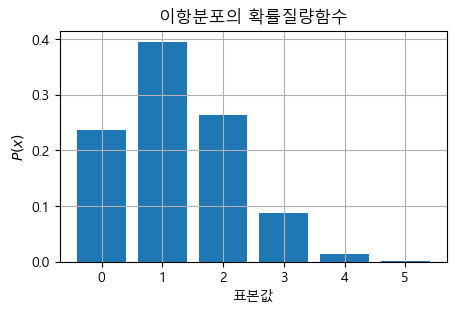

In [218]:
n = 5
mu = 0.25
rv = sp.stats.binom(n, mu)

xx = np.arange(n + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('이항분포의 확률질량함수')
plt.grid()
plt.show()

#### * scipy.stats에 있는 이항분포 확률변수의 표본값을 무작위로 생성

[1 2 1 1 1 2 1 2 3 1 2 1 1 3 0 0 0 2 2 2 3 2 1 2 0 2 0 3 1 1 1 2 1 1 0 1 1
 1 3 2 1 1 2 0 2 2 0 0 1 1 1 1 4 0 0 0 2 1 1 1 0 0 2 0 0 1 2 0 2 0 3 1 3 1
 2 0 1 0 1 0 1 1 0 2 1 1 1 0 1 3 1 2 0 2 1 0 1 0 2 0]


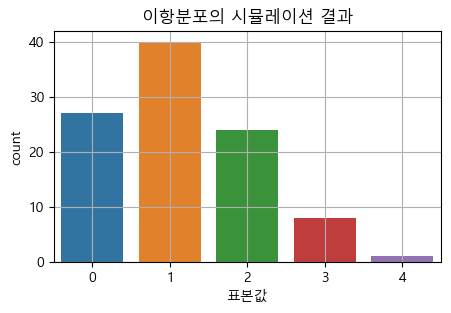

In [220]:
np.random.seed(0)
x = rv.rvs(100)
print(x)

sns.countplot(x=x)
plt.title('이항분포의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.grid()
plt.show()

### [예제]  이항분포 확률 구하기

최근의 한 통계에 의하면 우리나라 고등학생 중 40%가 담배를 피운다고 조사되었다. 만약 6명의 고등학생을 무작위로 추출한다면, 그 중에서 3명이 담배를 피울 확률을 구하시오

확률: 0.27648
기대값 E(X): 2.4
분산   V(X): 1.44
[0 1 2 3 4 5 6]
[0.047 0.187 0.311 0.276 0.138 0.037 0.004]
2.4000000000000004


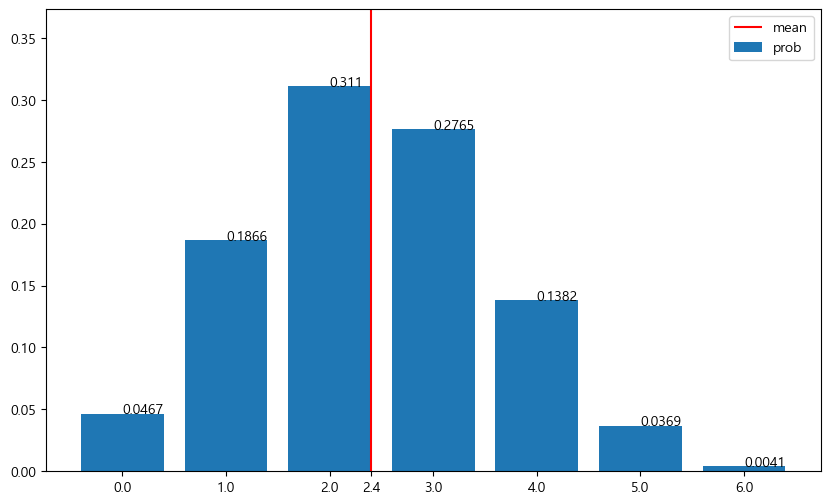

In [222]:
from scipy.special import comb

def prob(n, p, x):    
    return comb(n,x) * p**x * (1-p)**(n-x)
    
n = 6
p = 0.4
x = 3
print(f'확률: {prob(n, p, x)}')
X = Bin(n,p)
X 

# 기대값과 분산
check_prob(X)

# 그래프
plot_prob(X)

### [실습] 예제 7-2
4지선다형으로 주어진 5문제에서 임의로 답을 선택할 때, 정답을 선택한 문제 수를 확률변수 X라 할때, X의 평균과 분산은?

In [223]:
n = 5    # n의 개수를 크게 해보기 --> 그래프가 종모양으로 변경됨
p = 0.25   # 0.3, 0.5, 0.7 변경해보기
X = Bin(n,p)
X

(array([0, 1, 2, 3, 4, 5]), <function __main__.Bin.<locals>.f(x)>)

In [224]:
# 기대값과 분산
check_prob(X)

기대값 E(X): 1.25
분산   V(X): 0.9375


In [225]:
# 이항분포 기대값과 분산
def E_binom(n, p):
    return n*p

def V_binom(n, p):
    return n*p*(1-p)
    
    
print(f'기대값 E(X): {E_binom(n, p):.4}')
print(f'분산   V(X): {V_binom(n, p):.4}')


기대값 E(X): 1.25
분산   V(X): 0.9375


[0 1 2 3 4 5]
[0.237 0.396 0.264 0.088 0.015 0.001]
1.25


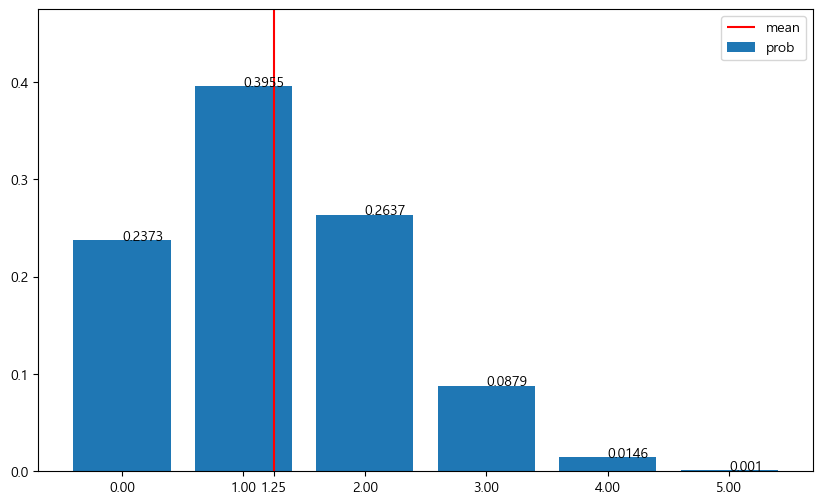

In [226]:
# 그래프
plot_prob(X)

### [실습] 이항분포 그래프 그리기
표본이 10,  확률이 0.3, 0.5, 0.7 인 그래프를 하나의 그래프에 그리시오

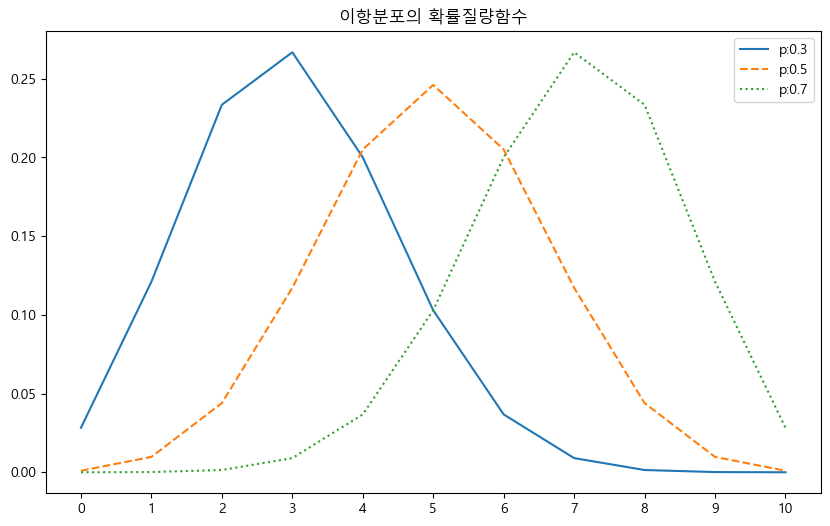

In [40]:
fig = plt.figure(figsize=(10,6))
ax  = fig.add_subplot(111) # (1,1,1)
linestyles = ['-','--',':']

n = 10
p = [0.3,0.5,0.7]
x = np.arange(n+1)

for p, ls in zip(p, linestyles):
    rv = sp.stats.binom(n, p)
    ax.plot(x, rv.pmf(x), label=f'p:{p}', linestyle=ls)

ax.set_xticks(x)
ax.legend()
plt.title('이항분포의 확률질량함수')    
plt.show()

### 3.기하분포(geometric distributuin)
베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포

- $X \sim Ge(p) : (1-p)^{x-1}p$
- $E(X)={1 \over p}$ 
- $V(X)={(1-p) \over p^2} $

In [227]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

p = 0.5
X = Ge(p)

기대값 E(X): 2.0
분산   V(X): 2.0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
[5.000e-01 2.500e-01 1.250e-01 6.250e-02 3.125e-02 1.562e-02 7.812e-03
 3.906e-03 1.953e-03 9.766e-04 4.883e-04 2.441e-04 1.221e-04 6.104e-05
 3.052e-05 1.526e-05 7.629e-06 3.815e-06 1.907e-06 9.537e-07 4.768e-07
 2.384e-07 1.192e-07 5.960e-08 2.980e-08 1.490e-08 7.451e-09 3.725e-09
 1.863e-09]
1.9999999422580004


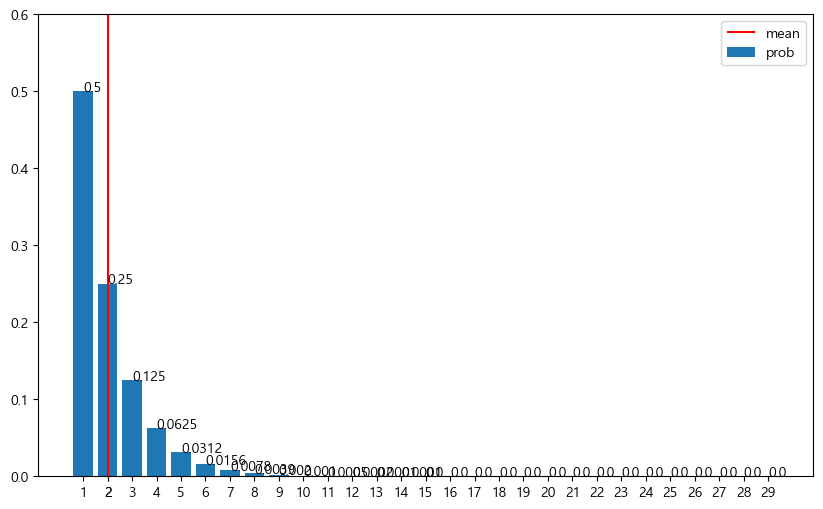

In [228]:
#기대값과 분산
check_prob(X)

#그래프
plot_prob(X)

#### * scipy.stats에 있는 기하분포의 (geom)함수 사용하기

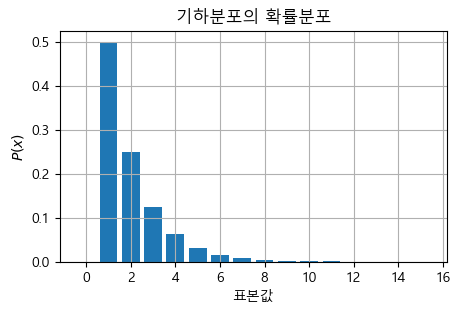

In [230]:
n, p = 15, 0.5
rv = sp.stats.geom(p)

xx = np.arange(n + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('기하분포의 확률분포')
plt.grid()
plt.show()

#### 기하분포 확률변수의 표본값을 무작위로 생성

[2 2 2 2 1 2 1 4 5 1 3 2 2 4 1 1 1 3 3 3 6 3 1 3 1 2 1 5 2 1 1 3 1 2 1 2 2
 2 5 2 1 1 2 1 2 2 1 1 1 1 2 1 7 1 1 1 2 1 1 1 1 1 2 1 1 1 3 1 3 1 6 1 6 2
 2 1 1 1 1 1 1 1 1 2 2 1 2 1 2 4 1 2 1 2 1 1 2 1 3 1]


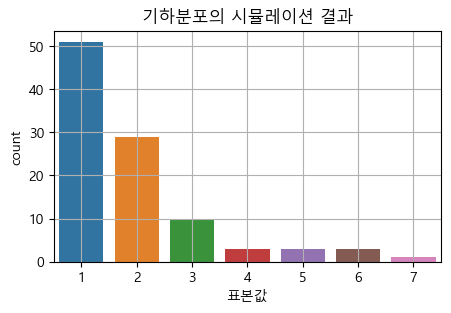

In [231]:
np.random.seed(0)
x = rv.rvs(100)
print(x)

sns.countplot(x=x)
plt.title('기하분포의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.grid()
plt.show()

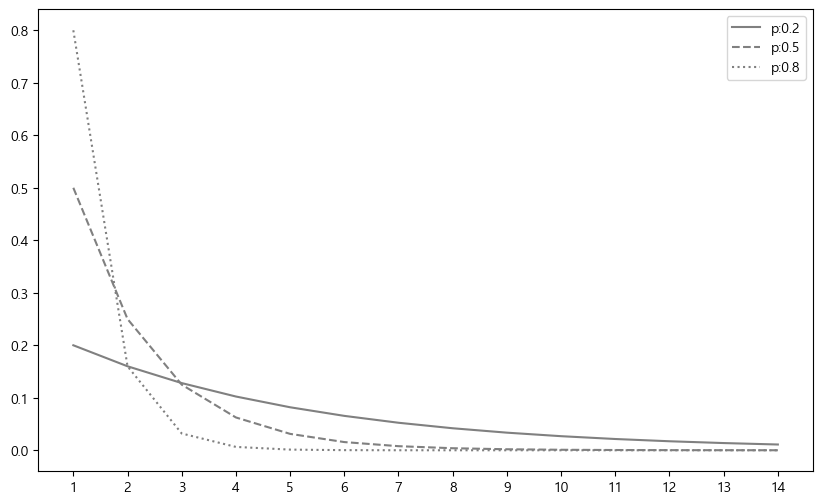

In [234]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
linestyles = ['-','--',':']

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = sp.stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

### 4.포하송 분포(poisson distributuin)
단위 시간 안에 어떤 사건이 몇 번 일어날 것인지를 표현하는 이산 확률 분포

In [236]:
from scipy.special import factorial
import numpy as np

def Poi(lamda):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return (np.power(lamda, x) * np.exp(-lamda)) / factorial(x) 
        else:
            return 0
    return x_set, f

lamda = 3
X = Poi(lamda)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <function __main__.Poi.<locals>.f(x)>)

기대값 E(X): 3.0
분산   V(X): 3.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[4.979e-02 1.494e-01 2.240e-01 2.240e-01 1.680e-01 1.008e-01 5.041e-02
 2.160e-02 8.102e-03 2.701e-03 8.102e-04 2.210e-04 5.524e-05 1.275e-05
 2.732e-06 5.463e-07 1.024e-07 1.808e-08 3.013e-09 4.757e-10]
2.9999999983234913


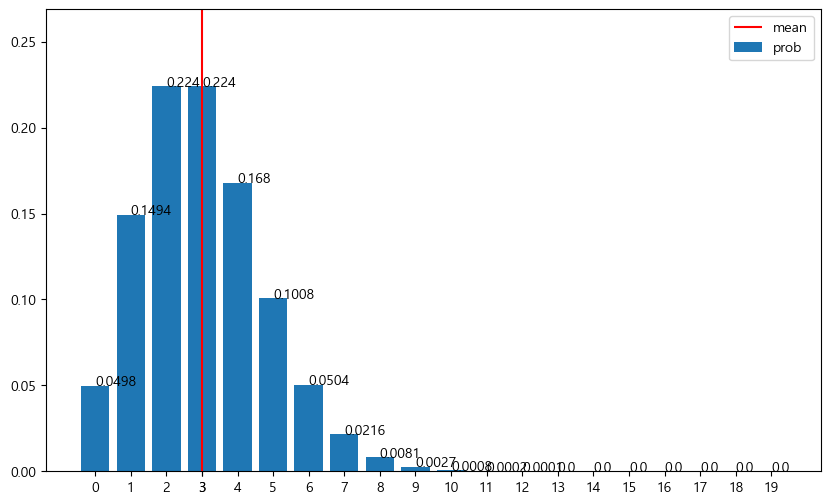

In [237]:
#기대값과 분산
check_prob(X)

#그래프
plot_prob(X)

#### * scipy.stats에 있는 포아송분포의 (poisson)함수 사용하기

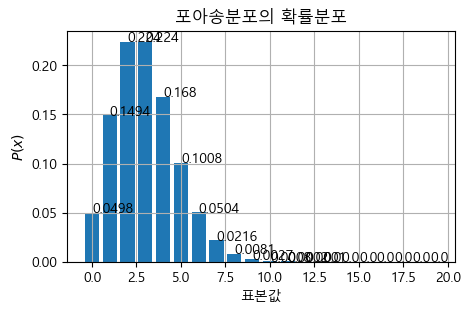

In [241]:
lamda = 3
rv = sp.stats.poisson(lamda)

xx = np.arange(20)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('포아송분포의 확률분포')
plt.grid()
for x, y in zip(xx, rv.pmf(xx)):
    plt.text(x, y, round(y,4))
plt.show()

#### *포아송분포 확률변수의 표본값을 무작위로 생성

[5 6 2 0 7 3 3 1 6 1 3 3 2 2 2 2 3 3 3 1 1 2 4 4 2 1 1 4 3 6 8 1 3 2 5 6 5
 4 1 6 2 1 1 4 0 3 5 2 4 1 3 0 1 4 2 4 4 5 2 2 4 2 2 2 4 4 1 5 5 8 3 3 3 6
 1 1 1 0 2 2 4 1 2 4 1 4 3 1 2 4 4 2 3 7 3 7 5 1 2 3]


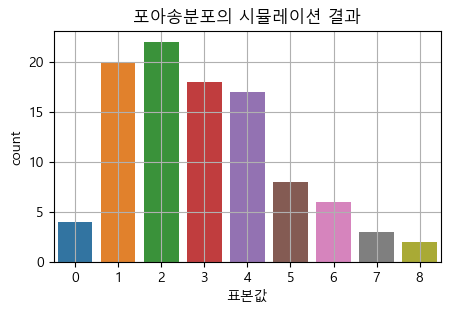

In [242]:
np.random.seed(0)
x = rv.rvs(100)
print(x)

sns.countplot(x=x)
plt.title('포아송분포의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.grid()
plt.show()

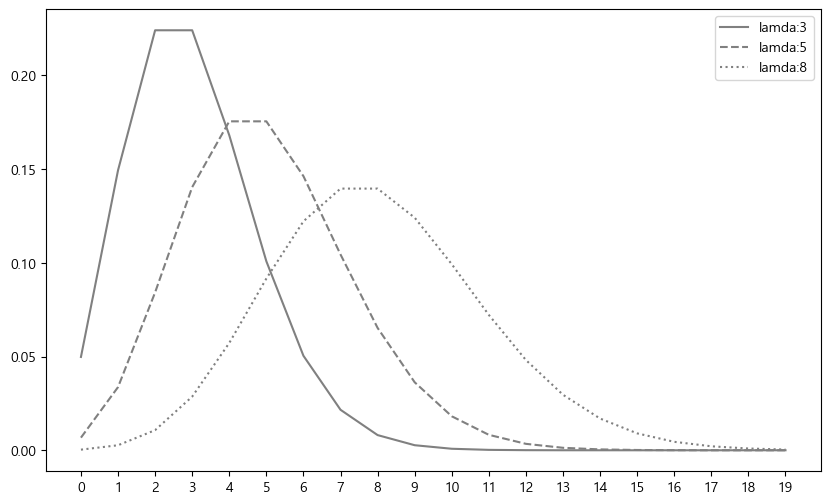

In [243]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lamda, ls in zip([3, 5, 8], linestyles):
    rv = sp.stats.poisson(lamda)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lamda:{lamda}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

### 5.카데고리분포(Categorical Distribution)
- 카테고리 시행(Categorical trial) 은 k개의 카테고리 중 하나를 선택하는 실험에서 각 카테고리가 선택될 확률이 μ=(μ1,⋯, μk)일 때 확률변수 X는 모수가  μ 이고 카테고리가 k개인 카테고리 분포(Categorical distribution)를 따른다
- 1~K까지 k개 정수값 중 하나의 확률변수를 갖는 분포
<br>
- 이진분류 : 베르누이분포(1번 시행)-->이항분포(N번 시행)
- 다중분류 : 카테고리분포(1번 시행)-->다항분포(N번 시행) ==>  **다항분포**
> - ex: 동전을 N번 던져 앞면이 나오는 횟수의 분포(이항분포)
> - **ex: 주사위를 N번 던져 각 면이 나오는 횟수 집합의 분포(다항분포)**

- $X \sim Cat(x; \mu)$
- $E(X_{k})=\mu_{k}=p_{k}$
- $V(X_{k})=\mu_{k}(1-\mu_{k})=p_{k}(1-p_{k})$

#### * scipy.stats에 있는 카데고리분포의 (multinomial)함수 사용하기

xx[1 2 3 4 5 6]의 one-hot-encoding:
   1  2  3  4  5  6
0  1  0  0  0  0  0
1  0  1  0  0  0  0
2  0  0  1  0  0  0
3  0  0  0  1  0  0
4  0  0  0  0  1  0
5  0  0  0  0  0  1


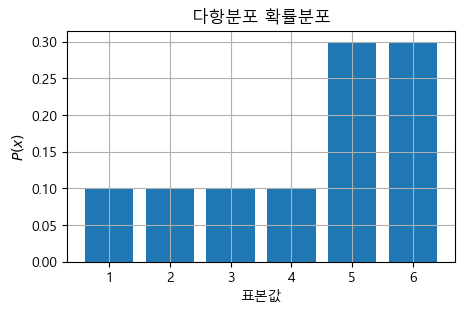

In [251]:
import scipy as sp
import numpy as np
import pandas as pd

mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu) # 카데고리분포

xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx) # 범주형 데이터를 만들기 위한 one-hot-encoding 방법
print(f'xx{xx}의 one-hot-encoding:\n{xx_ohe}')

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('다항분포 확률분포')
plt.grid()
plt.show()

#### *카데고리분포 확률변수의 표본값을 무작위로 생성

[[0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]]
[1.667 2.5   2.167 1.167 5.5   3.667]


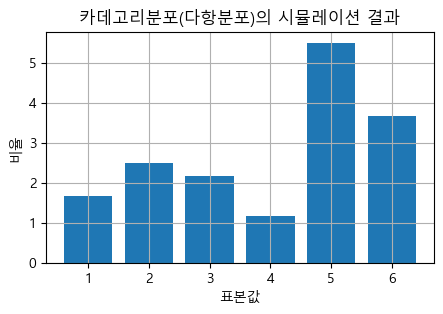

In [254]:
np.random.seed(1)
X = rv.rvs(100)
Y = X.sum(axis=0) / float(len(xx))
print(X[:6])
print(Y[:6])

plt.bar(np.arange(1,7), Y)
plt.xlabel('표본값')
plt.ylabel('비율')
plt.title('카데고리분포(다항분포)의 시뮬레이션 결과')
plt.grid()
plt.show()

#### * 이론적인 확률분포(rv.pmf사용)와 시뮬레이션 결과(rv.rvs사용)를 비교하면

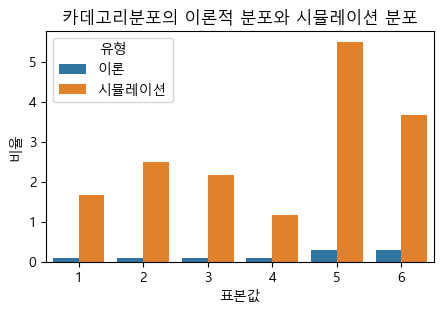

In [255]:
df = pd.DataFrame({'이론': rv.pmf(xx_ohe.values),'시뮬레이션': Y}, 
                  index=np.arange(1,7)).stack()
df = df.reset_index()
df.columns=['표본값','유형','비율']
df.pivot('표본값', '유형', '비율')
df

sns.barplot(data=df, x='표본값', y='비율', hue='유형')
plt.title('카데고리분포의 이론적 분포와 시뮬레이션 분포')
plt.show()

#### * 예: k=3 카데고리분포(붓꽃데이터) 

In [256]:
# 아래 예제는 사이킷런 라이브러리(머신러닝용)가 설치되어야 실행된다.
!pip install scikit-learn

df1.품종: [0, 1, 2]
Categories (3, int64): [0, 1, 2]
df2.품종: [0]
Categories (3, int64): [0, 1, 2]


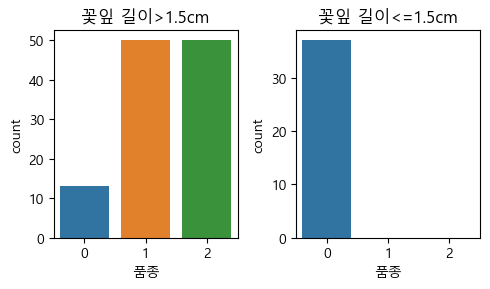

In [257]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['품종'] = pd.Series(iris.target, dtype='category')

df1 = df[ df['petal length (cm)'] > 1.5]  # 꽃잎 길이>1.5cm
df2 = df[ df['petal length (cm)'] <= 1.5] # 꽃잎 길이<=1.5cm
print(f'df1.품종: {df1.품종.unique()}')
print(f'df2.품종: {df2.품종.unique()}')

fig, ax = plt.subplots(1, 2)
sns.countplot(data=df1, x='품종', ax=ax[0]).set_title('꽃잎 길이>1.5cm')
sns.countplot(data=df2, x='품종', ax=ax[1]).set_title('꽃잎 길이<=1.5cm')
plt.tight_layout()
plt.show()

### 6.다항분포(Multinominal Distribution)

성공확률이 μ=(μ1,⋯, μk)인 카테고리 시행을 n번 반복했을 때의 각 카테고리별 성공횟수는 다항분포(Multinomial distribution)을 따르게 된다.

- 다중분류 : 카테고리분포(1번시행)-->다항분포(여러 번 시행)
<br><br>
- $X \sim Cat(x;N, \mu)$ = $X \sim Mu(x;N, \mu) $  #카테고리k,표본갯수N
- $E(X_{k})=N\mu_{k}=Np_{k}$
- $V(X_{k})=N\mu_{k}(1-\mu_{k})=Np_{k}(1-p_{k})$

[[ 4  0  4  4  9  9]
 [ 2  2  4  2  7 13]
 [ 4  6  0  3 10  7]
 [ 3  4  2  5  9  7]
 [ 3  1  3  4  9 10]
 [ 3  3  3  4  9  8]]


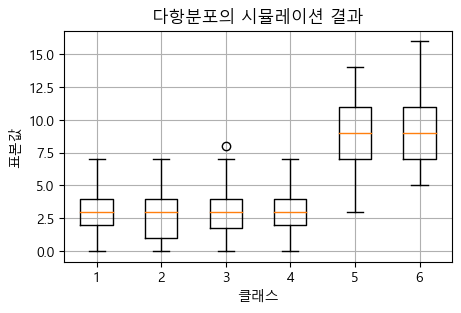

In [261]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu) # 다항분포

np.random.seed(10)
X = rv.rvs(100)
print(X[:6])  # 6개만 보여주기

plt.boxplot(X)
plt.xlabel('클래스')
plt.ylabel('표본값')
plt.title('다항분포의 시뮬레이션 결과')
plt.grid()
plt.show()

In [268]:
#X

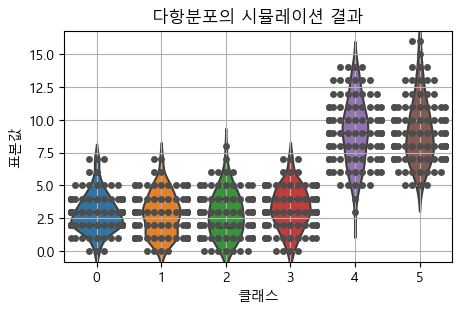

In [280]:
# Seaborn의 violinplot으로 시각화하기
df = pd.DataFrame(X).stack().reset_index()  # .stack(): 컬럼을 인덱스로 만들고, 다시 인덱스를 재설정한다.
# df = pd.DataFrame(X)
# df = pd.DataFrame(X).stack()
df
df.columns = ["시도", "클래스", "표본값"]

sns.violinplot(data=df, x="클래스", y="표본값", inner="quartile") 
sns.swarmplot(data=df, x="클래스", y="표본값", color=".3")
plt.title("다항분포의 시뮬레이션 결과")
plt.grid()
plt.show()

------------------------------

-------

## <a name="7.2연속확률분포">7.2 연속확률분포</a>

### 연속확률변수에서 다룬 내용(함수)

[예제 6-7]에 대해서 구현함 :  **$f(x) = {1 \over 8}x,   (0 \le x \le4)$**

- **확률변수의 상태공간과 확률밀도함수 f(x)**

In [281]:
# 연속확률변수 확률밀도함수 구현하기

# 상태구간
x_range = np.array([0,4]) # 0~4의 구간일 경우
x_range


# 확률밀도함수
def f(x):
    if x_range[0] < x <= x_range[1]:
        return (1/8*x)
    else:
        return 0

    
# 확률변수
X = [x_range, f]

- **확률(면적)**

In [282]:
from scipy import integrate

integrate.quad(f, 2, 3)  #f:피적분함수, 2,3: 적분범위   
#결과값: (0.3125, 3.469446951953614e-15)=(적분값, 추정오차)

(0.312, 0.000)

#### 연속확률변수와 관련 있는 함수:  기대값E(X) & 분산Var(X) 등
- 기댓값 $\mu = E(X) $= **$\int_{-\infty}^{\infty} xf(x)dx  $**
- 분산 Var(X) =  $E(X^2) -\mu^2$
- $E(X^2)$ = $\int_{-\infty}^{\infty} x^2f(x)dx$

In [283]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

# 기대값:평균
def E(X, g=lambda x:x):
    x_range, f = X
    
    def integrand(x):
        return g(x) * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]


# 분산
def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]


def check_prob(X):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf), 4)
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')
    print(f'표준편차STD(X): {V(X)**(1/2):.4}') 
    

# 확률
def get_prob(X, a, b):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, a, b), 4)
    
    print(f'확률: {prob_sum[0]}')
    

# 그래프(구간 색칠하기)
def plot_prob(X, x_min, x_max):
    x_range, f = X
    
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
        
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)    
    
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray', linestyle='--')
    ax.legend()

    plt.show() 


- [문제] $P(2 < X \le 3)$ 확률은?

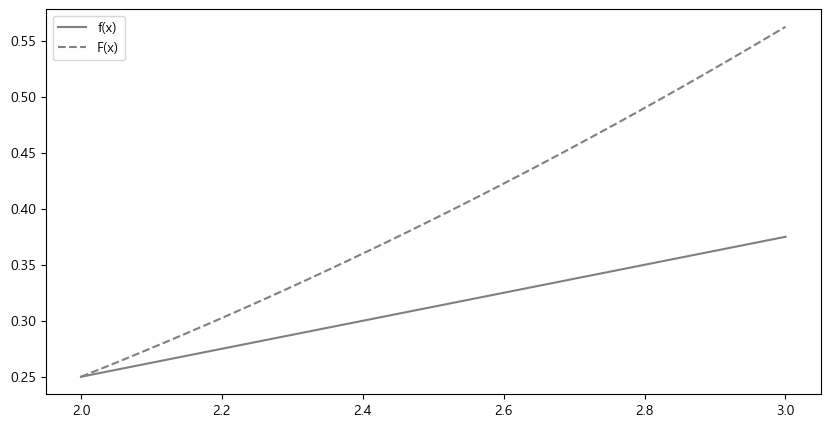

In [284]:
plot_prob(X, 2, 3)

### 정규분포 
- 자연현상이나 사회현상에서 얻게 되는 대부분의 자료에 대한 히스토그램은 자료의 수가 클수록 계급간격이 좁아지고, 그림과 같이 좌우 대칭인 종 모양 의 곡선에 가까워진다. 
- N개의 임의의 분포로부터 얻은 표본의 평균은 N이 증가할수록 기댓값이 μ, 분산이 σ2인 정규분포로 수렴한다-->중심극한의정리(여러 확률변수의 합이 정규분포와 비슷한 분포를 이루는 현상을 말한다)

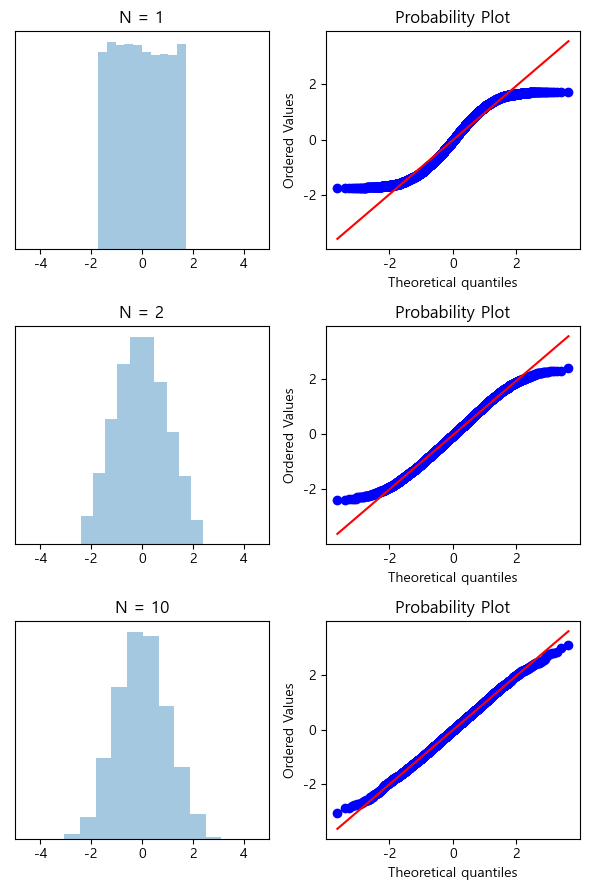

In [285]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

plt.figure(figsize=(6, 9))

for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title(f"N = {N}")
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt) #QQ-plot: 정규분포를 따르는지 확인

plt.tight_layout()
plt.show()

- 이항분포 B(n, p)에서 p가 일정하고 n이 커지면 이항분포의 그래프는 그림과 같이 종 모양에 가까워진다.


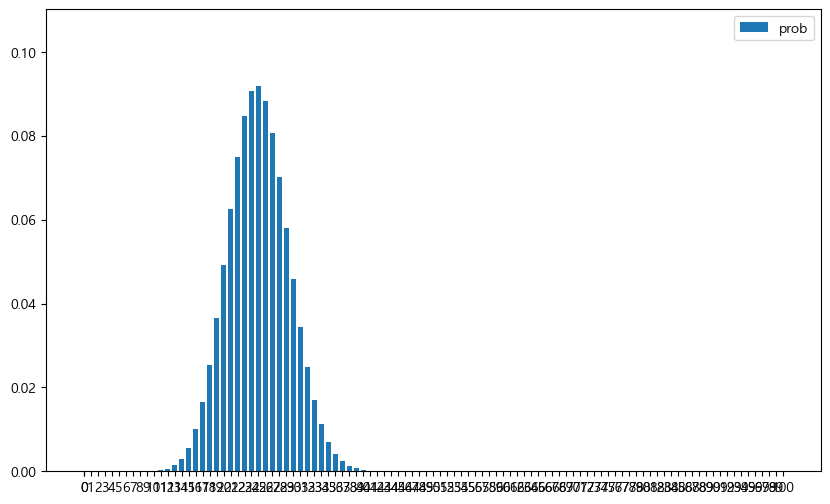

In [286]:
def plot_prob_bi(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.set_xticks(np.append(x_set, E(X)))   #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)          #y축의 한계 지정
    ax.legend()
   
    plt.show()

n = 100    # n의 개수를 크게 해보기 --> 그래프가 종모양으로 변경됨
p = 0.25   # 0.3, 0.5, 0.7 변경해보기
X = Bin(n,p)
plot_prob_bi(X)

### 1. 정규분포

In [287]:
#𝑍 ~ N(0,1) 정규화를 따른 정규분포
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

기대값 E(X): 2.0
분산   V(X): 0.25
표준편차STD(X): 0.5


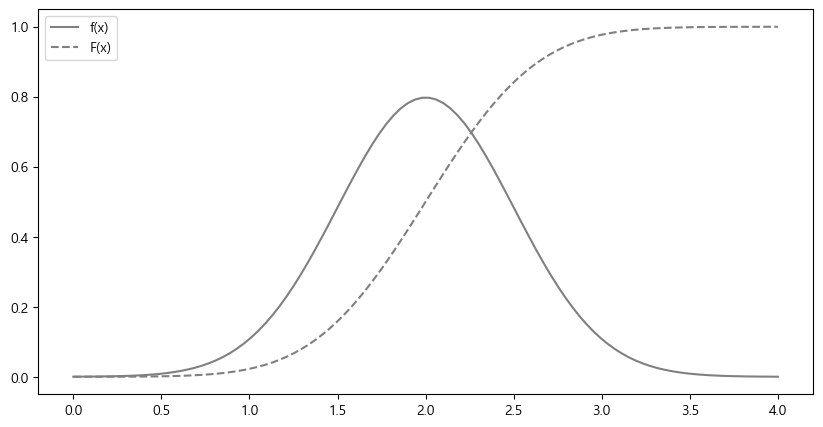

In [288]:
#X ~ N(2, 0.5^2 )
mu, sigma = 2, 0.5
X = N(mu, sigma)
X
check_prob(X)
plot_prob(X, 0, 4)

### [실습] 정규분포를 이용한 확률 구하기
남자 고등학생 키의 평균이 170cm이고 표준편차가 5cm라면, 우연히 만난 남자 고등학생의 키는 N(170, 5^2)를 따른 다고 할 수 있다. 이 사실을 바탕으로 우연히 만난 남자 고등학생의 키가 165cm이상 175cm 이하일 확률은?

확률: 0.6827
기대값 E(X): 4.157e-72
분산   V(X): 3.226e-70
표준편차STD(X): 1.796e-35


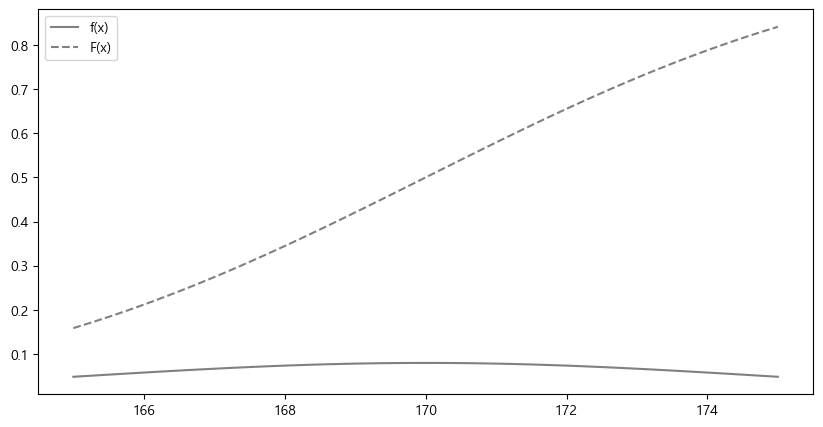

In [289]:
mu, sigma = 170, 5
X = N(mu, sigma)

a, b = 165, 175
get_prob(X, a, b)


#기대값과 분산
check_prob(X)


#정규분포 그래프: P(a <= X <= b) 
plot_prob(X, a, b)

### [실습] 정규분포를 이용한 확률 구하기
모의고사 평균 점수가 70점이고 표준편차가 8점이라면, 우연히 만난 학생의 점수는 N(70, 8^2)을 따른다고 할 수 있다. 이 사실을 바탕으로 우연히 만난 학생의 점수가 54점 이상 86점 이하일 확률은?

확률: 0.9545
기대값 E(X): 70.0
분산   V(X): 64.0
표준편차STD(X): 8.0


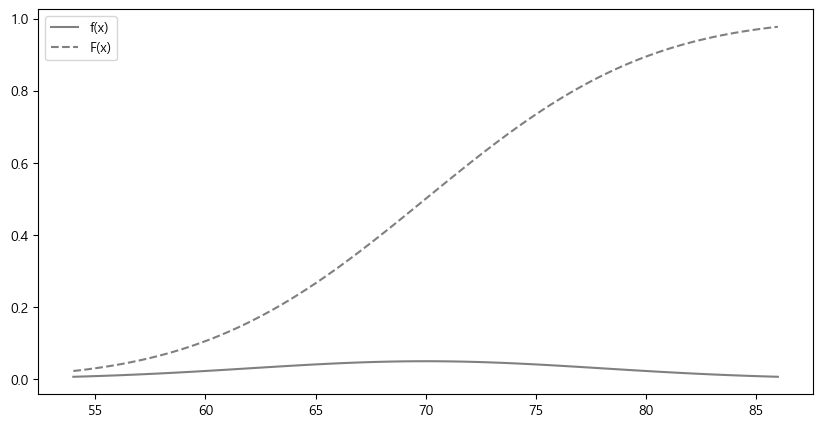

In [290]:
mu, sigma = 70, 8
X = N(mu, sigma)

a, b = 54, 86
get_prob(X, a, b)


#기대값과 분산
check_prob(X)


#정규분포 그래프: P(a <= X <= b) , a=0, b=4
plot_prob(X, a, b)

### scipy 연속확률분포 클래스 종류 
- 연속 : uniform (균일분포)
- 연속 : norm (정규분포)
- 연속 : beta (베타분포)
- 연속 : gamma (감마분포)
- 연속 : t (스튜던트 t분포)
- 연속 : f (F분포)
- 연속 : chi2 (카이제곱분포)
- 연속 : dirichlet (디리클리분포)    
- 연속 : multivariate_normal (다변수 정규분포)

#### * 정규분포(scipy.stats.norm)

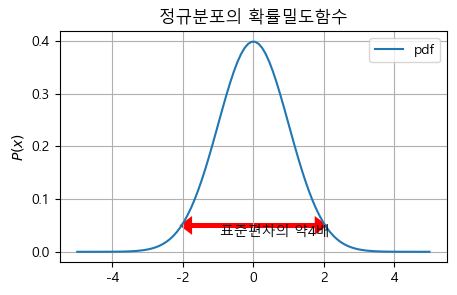

In [291]:
import scipy as sp

mu, std = 0, 1
rv = sp.stats.norm(mu, std) #  확률밀도함수

xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx), label='pdf')
# plt.plot(xx, rv.cdf(xx), label='cdf')
plt.arrow(0, 0.05, 2, 0, lw=3, color='r',
         head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r',
         head_width=0.02, head_length=0.2, length_includes_head=True)
plt.text(-0.95, 0.03, '표준편차의 약4배')
plt.ylabel('$P(x)$')
plt.title('정규분포의 확률밀도함수')
plt.legend()
plt.grid()
plt.show()

#### * 정규분포 표본값을 무작위로 생성

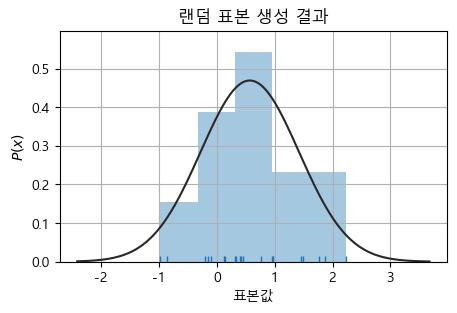

In [292]:
np.random.seed(0)
x = rv.rvs(20)
# print(x)

sns.distplot(x, rug=True, kde=False, fit=sp.stats.norm)
plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.grid()
plt.show()

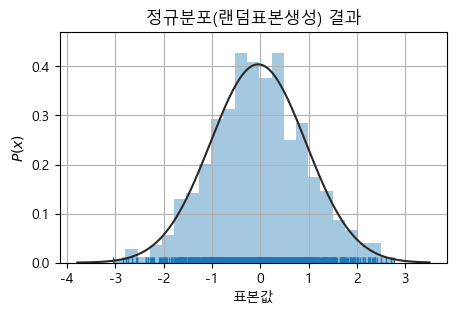

In [293]:
# 랜덤표본 생성하여  정규분포 그래프 그리기
np.random.seed(0)
X = rv.rvs(1000)
# Y = sp.stats.norm.pdf(X, loc=MEAN, scale=STD)
Y = rv.pdf(X)

sns.distplot(X, rug=True, kde=False, fit=sp.stats.norm)
plt.title('정규분포(랜덤표본생성) 결과')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')

plt.hlines(0, min(X), max(X), alpha=0.3)
plt.fill_between(X, Y, where=(X>=165) & (X<=170), color='red', alpha=0.5)

plt.grid()
plt.show()



### [실습] scipy.stats에 있는 norm함수 사용하여 확률구하기
남자 고등학생 키의 평균이 170cm이고 표준편차가 5cm라면, 우연히 만난 남자 고등학생의 키는 N(170, 5^2)를 따른 다고 할 수 있다. 이 사실을 바탕으로 우연히 만난 남자 고등학생의 키가 165cm이상 175cm 이하일 확률은?

In [294]:
import scipy as sp

MEAN, STD = 170, 5 #평균:170, 표준편차:5
x1, x2 = 165, 175
rv = sp.stats.norm(loc=MEAN, scale=STD)  

# 누적분포함수에 의해 구간 확률 계산
print(f'P({x1}<=X<={x2})= {rv.cdf(x2) - rv.cdf(x1)}')

P(165<=X<=175)= 0.6826894921370859


### 정규분포 그래프 예제  

#### * 정규분포 그래프 예제(붓꽃 데이터)
붓꽃 중 특정한 종(setosa)의 꽃잎 길이(petal length (cm))에 대한 히스토그램--> 정규분포와 비슷

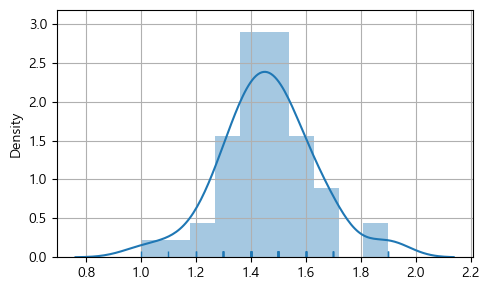

In [295]:
from sklearn.datasets import load_iris

data = load_iris()
setosa_sepal_length = data['data'][:50, 2]  # petal length (cm)
setosa_sepal_length

sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.grid()
plt.show()

#### * 정규분포 그래프 예제(미국 나스닥 수익율)
- pandas_datareader 라이브러리의 DataReader 함수는 웹 상의 데이터를 DataFrame 객체로 만드는 기능을 제공함


#### 라이브러리 설치하기

In [296]:
!pip install pandas_datareader

                                              0.0/109.5 kB ? eta -:--:--
     -------------------------------------- 109.5/109.5 kB 6.6 MB/s eta 0:00:00


In [297]:
import pandas_datareader as pdr

help(pdr)

Help on package pandas_datareader:

NAME
    pandas_datareader

PACKAGE CONTENTS
    _testing
    _utils
    _version
    av (package)
    bankofcanada
    base
    compat (package)
    conftest
    data
    econdb
    enigma
    eurostat
    exceptions
    famafrench
    fred
    iex (package)
    io (package)
    moex
    nasdaq_trader
    naver
    oecd
    quandl
    stooq
    tests (package)
    tiingo
    tsp
    wb
    yahoo (package)

FUNCTIONS
    DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
        Imports data from a number of online sources.
        
        Currently supports Google Finance, St. Louis FED (FRED),
        and Kenneth French's data library, among others.
        
        Parameters
        ----------
        name : str or list of strs
            the name of the dataset. Some data sources (IEX, fred) will
            accept a list of names.
        data_source: {str, None}
            the data

과거 10년간의 미국 나스닥 주가지수

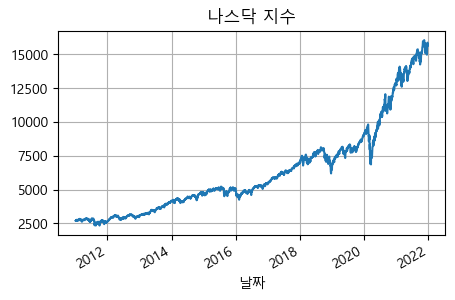

In [298]:
import pandas as pd
import pandas_datareader as pdr

symbol = 'NASDAQCOM'
data = pd.DataFrame()

data[symbol] = pdr.DataReader(symbol, data_source='fred',
                            start='2011-01-01', end='2021-12-31')[symbol]

data = data.dropna()
data
data.plot(legend=False)
plt.xlabel('날짜')
plt.title('나스닥 지수')
plt.grid()
plt.show()

In [299]:
import pandas_datareader as pdr

symbol = 'NASDAQCOM'
df = pdr.DataReader(symbol, data_source='fred',
                            start='2011-01-01', end='2021-12-31')
data = df.copy()
data = data.dropna()
data.head()

,NASDAQCOM
DATE,
2011-01-03,2691.52
2011-01-04,2681.25
2011-01-05,2702.20
2011-01-06,2709.89
2011-01-07,2703.17


In [300]:
# 일간 수익률과 변동성
daily_returns = data.pct_change().dropna()  # 결측치 제거
daily_returns
mean= daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print(f'평균 일간수익률 : {mean*100:>3.2f}%')
print(f'평균 일간변동성 : {std*100:>3.2f}%')

평균 일간수익률 : 0.07%
평균 일간변동성 : 1.22%


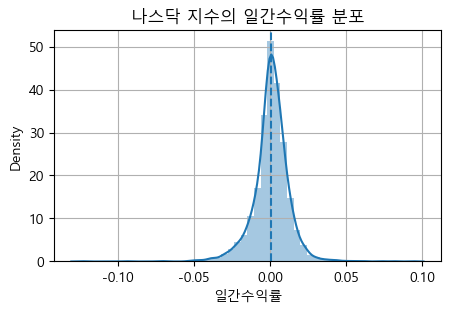

In [301]:
# 일간 수익률 분포그래프 그리기
# - KDE(Kernel Density Estimator):  커널 밀도 추정
#      분포를 부드럽게 곡선화시켜 주는 옵션
sns.distplot(daily_returns, kde=True)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls='--')
plt.ylim(0, ymax)
plt.title('나스닥 지수의 일간수익률 분포')
plt.xlabel('일간수익률')
plt.grid()
plt.show()

### [실습] pandas_datareader : 국내 특정 주가(삼성전자) 정보 그래프로 나타내기

평균 일간수익률 : 0.08%
평균 일간변동성 : 2.63%


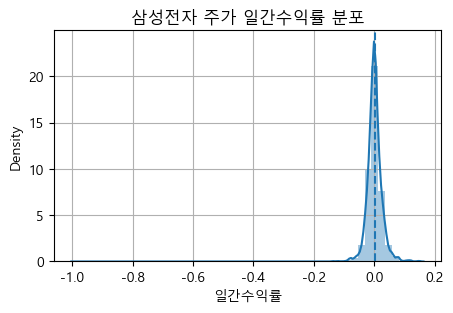

In [302]:
# http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201
import pandas_datareader as pdr

symbol = '005930' # 삼성전자: 
data = pd.DataFrame()

df = pdr.DataReader(symbol, data_source='naver',
                   start='1980-01-01', end='2022-05-26')
df
data = df.copy()
data = data.drop(columns=['Open','High','Low','Volume']) # 컬럼삭제
data = data.dropna()
data = data.astype({'Close':'int'}) # 컬럼타입 정수로 변환
data


# 일간 수익률과 변동성
daily_returns = data.pct_change().dropna()  # 결측치 제거
daily_returns
mean= daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print(f'평균 일간수익률 : {mean*100:>3.2f}%')
print(f'평균 일간변동성 : {std*100:>3.2f}%')

sns.distplot(daily_returns, kde=True)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls='--')
plt.ylim(0, ymax)
plt.title('삼성전자 주가 일간수익률 분포')
plt.xlabel('일간수익률')
plt.grid()
plt.show()

---------

### [실습] 예제 7-6 : 정규분포에 대한 평균과 표준편차 구하기

In [303]:
#기대값과 분산
check_prob( N(1, 4**(1/2)) )  # N(1, np.sqrt(4))
check_prob( N(-1, 9**(1/2)) )
check_prob( N(2, 1**(1/2)) )
check_prob( N(8, 16**(1/2)) )

기대값 E(X): 1.0
분산   V(X): 4.0
표준편차STD(X): 2.0
기대값 E(X): -1.0
분산   V(X): 9.0
표준편차STD(X): 3.0
기대값 E(X): 2.0
분산   V(X): 1.0
표준편차STD(X): 1.0
기대값 E(X): 8.0
분산   V(X): 16.0
표준편차STD(X): 4.0


In [304]:
# rv.mean(), rv.var() rv.std()
import scipy as sp

rv = sp.stats.norm(loc=1, scale=4**(1/2))   # scale=np.sqrt(4)
print(f'평균: {rv.mean()}, 표준편차: {rv.std()}')
rv = sp.stats.norm(loc=-1, scale=9**(1/2)) 
print(f'평균: {rv.mean()}, 표준편차: {rv.std()}')
rv = sp.stats.norm(loc=2, scale=1**(1/2)) 
print(f'평균: {rv.mean()}, 표준편차: {rv.std()}')
rv = sp.stats.norm(loc=8, scale=16**(1/2)) 
print(f'평균: {rv.mean()}, 표준편차: {rv.std()}')

평균: 1.0, 표준편차: 2.0
평균: -1.0, 표준편차: 3.0
평균: 2.0, 표준편차: 1.0
평균: 8.0, 표준편차: 4.0


### [참고] 확률분포와 꼬리확률 확인

In [305]:
rv = sp.stats.norm(loc=0, scale=1)

In [306]:
#확률밀도함수 : P(X=x) 
rv.pdf(2) 

0.054

In [307]:
#확률분포함수 : P(X<=x) 
rv.cdf(1.7)

0.955

In [308]:
#상위 100𝛼"%" 점:Z𝛼 인 꼬리확률: 백분위수를 Za 로 표시
rv.isf(0.3)   #상위 30%인 z점

0.524

In [309]:
rv.isf(0.05)   #상위 5%인 z점

1.645

In [310]:
#확률이 a가 되는 가운데 부분의 구간(면적)
rv.interval(0.9)   # 90%구간

(-1.645, 1.645)

In [311]:
#오른쪽과 왼쪽 5%씩 남는 구간과 같다.
rv.isf(0.95), rv.isf(0.05)

(-1.645, 1.645)

In [312]:
rv.isf(0.9750)   

-1.960

### [실습] 예제 7-7 : 표준정규분포의 확률 계산

In [313]:
import scipy as sp

rv = sp.stats.norm(loc=0, scale=1)

print(f'a.P(Z<=-1.45)   : {round(rv.cdf(-1.45), 4)}')
print(f'b.P(0<=Z<=2.58) : {round(rv.cdf(2.58) - 0.5, 4)}')
print(f'c.P(Z>=2.04)    : {round(1 -rv.cdf(2.04), 4)}')
print(f'd.P(-1.37<=Z<=0): {round(0.5 - rv.cdf(-1.37), 4)}')
print(f'e.P(|Z|<=1.69)  : {round((0.5-rv.cdf(-1.69))*2, 4)}')
print(f'f.P(|Z|>=2.79)  : {round(rv.cdf(-2.79)*2, 4)}')

a.P(Z<=-1.45)   : 0.0735
b.P(0<=Z<=2.58) : 0.4951
c.P(Z>=2.04)    : 0.0207
d.P(-1.37<=Z<=0): 0.4147
e.P(|Z|<=1.69)  : 0.909
f.P(|Z|>=2.79)  : 0.0053


#### * scipy norm 함수로 확률 계산
교재 예제 $X \sim N(30, 4^2)$에 대해 $P(27\le X \le 35)$의 확률은?

In [314]:
import scipy as sp

rv = sp.stats.norm(loc=30, scale=16**(1/2))

print(f'P(27<=X<=35): {round(rv.cdf(35) - rv.cdf(27), 4)}')

P(27<=X<=35): 0.6677


### [실습] 예제 7-9 : 정규분포 확률 구하기

In [315]:
rv = sp.stats.norm(loc=75, scale=25**(1/2))

print(f'P(X<=64)    : {round(rv.cdf(64), 4)}')
print(f'P(68<=X<=82): {round(rv.cdf(82) - rv.cdf(68), 4)}')
print(f'P(X>=87.5)  : {round(1-rv.cdf(87.54), 4)}')

P(X<=64)    : 0.0139
P(68<=X<=82): 0.8385
P(X>=87.5)  : 0.0061


### 이항분포의 정규근사
모수 n과 p인 이항분포에 대하여 $np \ge 5$, $nq \ge 5$인 경우, n이 커질수록 이항분포 $B(n, p)$는 정규분포 $N(np, npq)$에 근사하며, 이것을 이항분포의 정규근사(normal approximation)라 한다

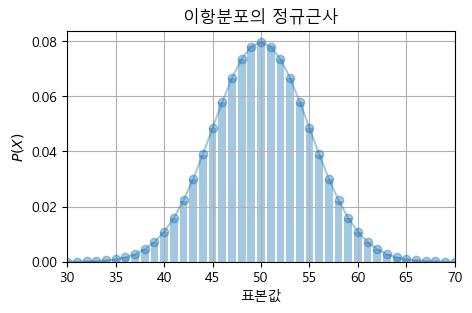

In [316]:
n, mu1  = 100, 0.5
mu2,std = 50, 5
rv1 = sp.stats.binom(n, mu1)
rv2 = sp.stats.norm(mu2, std)

xx = np.arange(n+1)
plt.plot(xx, rv1.pmf(xx), 'o-', alpha=0.4)
plt.bar(xx, rv2.pdf(xx), alpha=0.4)
plt.xlim(30, 70)  # x축 범위
plt.xlabel('표본값')
plt.ylabel('$P(X)$')
plt.title('이항분포의 정규근사')
plt.grid()
plt.show()

### [실습] 예제 7-11 : 이항분포의 정규근사 확률 구하기
5지선다형인 100문제를 무작위로 선정하여 정답을 14개 이상 25개 이하로 맞출 근사확률은?

In [317]:
# N( np, np.sqrt(np(1-p)) )
n, p, q = 100, 0.2, 0.8 
a, b = 14, 25

# 방법1
X = N(n*p, np.sqrt(n*p*q))
get_prob(X, a, b)


# 방법2
rv = sp.stats.norm(loc=n*p, scale=np.sqrt(n*p*q))
print(f'P({a}<=X<={b}): {rv.cdf(b) - rv.cdf(a)}')

확률: 0.8275
P(14<=X<=25): 0.8275430250642866


**Q**.주사위를 720번 던져서 1의 눈이 105번 이상 145번 이하로 나올 근사확률은?

In [318]:
# N( np, np.sqrt(np(1-p)) )
n, p, q = 720, 1/6, 5/6 
a, b = 105, 145

# 방법1
X = N(n*p, np.sqrt(n*p*q))
get_prob(X, a, b)


# 방법2
rv = sp.stats.norm(loc=n*p, scale=np.sqrt(n*p*q))
print(f'P({a}<=X<={b}): {rv.cdf(b) - rv.cdf(a)}')

확률: 0.927
P(105<=X<=145): 0.9269831334053658


---------

### 지수분포 
단위시간당 평균 λ번 발생하는 사건의 발생 간격을 따르는 확률분포 

In [319]:
def Ex(lamda):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lamda * np.exp(-lamda * x)
        else:
            return 0
    return x_range, f

**Q**.하루당 평균 2건의 교통사고가 발생하는 지역에서 3일 이내 또 교통사고가 일어날 확률


확률: 0.9975


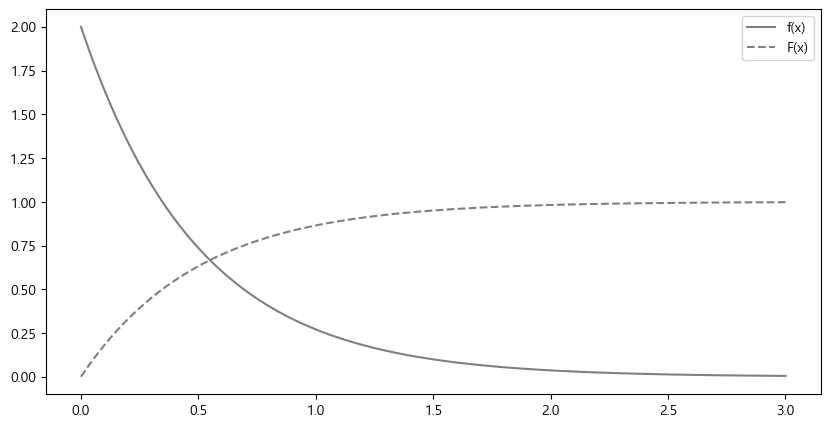

P(X<=3): 0.9975212478233336


In [320]:
lamda, a, b = 2, 0, 3
X = Ex(lamda)

# 방법1
get_prob(X, a, b)
plot_prob(X, a, b)

# 방법2
rv = sp.stats.expon(scale=1/lamda)
print(f'P(X<={b}): {rv.cdf(b)}')

**Q**.1시간당 평균 10번 액세스하는 사이트에서 1분 이내에 또 액세스할 확률


확률: 0.1535


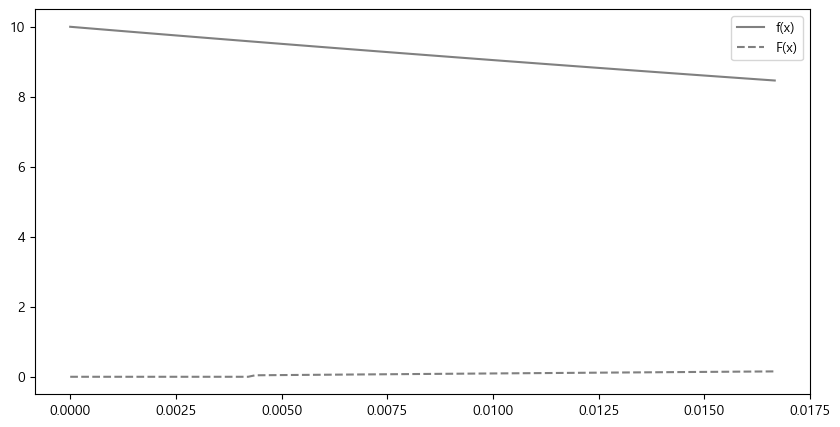

P(X<=0.016666666666666666): 0.15351827510938593


In [321]:
lamda, a, b = 10, 0, 1/60
X = Ex(lamda)

# 방법1
get_prob(X, a, b)
plot_prob(X, a, b)

# 방법2
rv = sp.stats.expon(scale=1/lamda)
print(f'P(X<={b}): {rv.cdf(b)}')

### t-분포
- 정규분포에서 파생된 분포로 모평균의 구간추정 등에 사용되는 확률분포
- 현실의 데이터를 살펴보면 정규분포와 상당히 유사하지만 양 끝단의 비중이 정규분포에 비해 더 큰 데이터들을 발견할 수 있다. 분포의 모양을 볼 때 양 끝(꼬리) 부분이 정규분포보다 두껍다고 해서 이를 팻 테일(fat tail) 현상이라고 하며 팻 테일을 보이는 데이터 모형에 적합한 것이 스튜던트 t분포(student-t distribution) 혹은 t분포라고 부르는 분포다


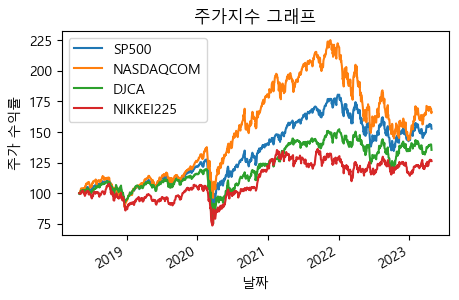

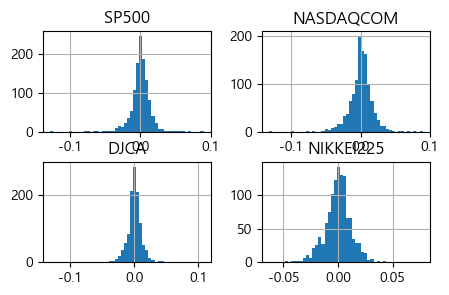

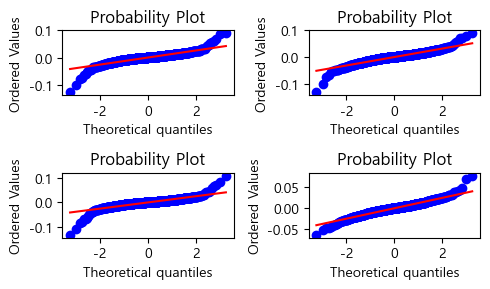

In [322]:
import pandas_datareader.data as pdr

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = pdr.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()
plt.xlabel("날짜")
plt.ylabel("주가 수익률")
plt.title('주가지수 그래프')
plt.show()

# 지수의 일간 수익율
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

# Q-Q 플롯으로 정규(분포)성 확인
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

#### * 자유도에 따른 스튜던트 t분포의 변화
- 자유도(dof: degree of freedom) : 자유스러운 정도
    
> - ex: 3개의 시험을 봤는데 평균이 80점인 경우 2개의 시험에서 각각 70점, 90점의 성적을 받았다면나머지 1개의 시험 성적은 평균에 의하여 반드시 80점이어야 한다.따라서 이 경우에는 표본수가 3이지만 자유롭게 변할 수 있는 것은 2(3-1)개이다.

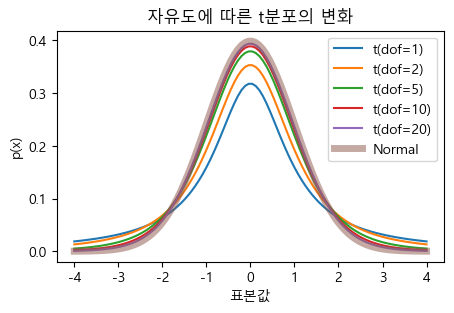

In [323]:
xx = np.linspace(-4, 4, 100)
for dof in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=dof)
    plt.plot(xx, rv.pdf(xx), label=(f"t(dof={dof})") )
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

In [324]:
# 오른쪽 꼬리확률: z점 확인
rv = stats.t(5) # dof=5
rv.isf(0.05)    # 알파=0.05

2.015

### 카이제곱분포
- 정규분포에서 파생된 분포로 추정과 검정에 사용하는 특수한 확률분포
- 분산(평균을 중심으로 치우친 정도의 척도)의 특징을 확률분포로 만든 것으로 분산의 구간추정이나 독립성 검정에서 사용


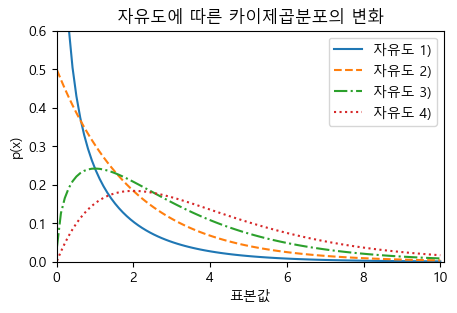

In [325]:
xx = np.linspace(0.01, 10, 100)
dofs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for dof, ls in zip(dofs, lss):
    rv = sp.stats.chi2(df=dof)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=(f"자유도 {dof})"))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이제곱분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

In [326]:
# 오른쪽 꼬리확률: z점 확인
rv = stats.chi2(5)  # dof=5
rv.isf(0.05)        # 알파=0.05

11.070

### F분포
- 정규분포에서 파생된 분포로 분산분석 등에서 사용되는 확률분포
- 두 집단의 분산이 크기가 서로 같은 지 다른 지 비교할 때 나눗셈을 활용하여 두 집단의 분산을 비교한다

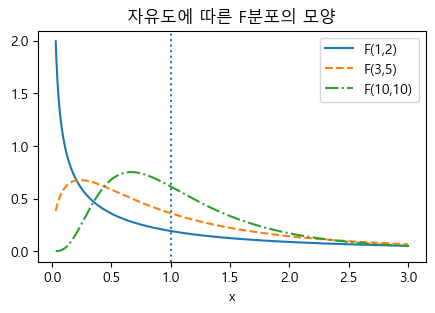

In [327]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()

--------

끝